<a href="https://colab.research.google.com/github/bkousalya/Hand-written_digit_recognition/blob/main/Hand_written_digit__recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install imdbpy


     |████████████████████████████████| 307kB 11.8MB/s 


In [6]:
pip install tensorflow

In [7]:
import tensorflow as tf



In [8]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
img_rows,img_cols = (28,28)

In [10]:
pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

In [12]:
image_index = 7777

In [13]:
print(y_train[image_index])

8


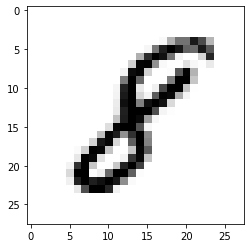

In [14]:
plt.imshow(x_train[image_index], cmap='Greys')

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [16]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [17]:
x_train = x_train.astype('float32')


In [18]:
x_test = x_test.astype('float32')


In [19]:
x_train /= 255


In [20]:
x_test /= 255

In [21]:
print('x_train shape:', x_train.shape)


x_train shape: (60000, 28, 28, 1)


In [22]:
print('Number of images in x_train', x_train.shape[0])


Number of images in x_train 60000


In [23]:
print('Number of images in x_test', x_test.shape[0])

Number of images in x_test 10000


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [25]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [26]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
model.fit(x=x_train,y=y_train, epochs=7)

1875/1875 [==============================] - 26s 14ms/step - loss: 0.0334 - accuracy: 0.9894


In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0553 - accuracy: 0.9846


[0.05533786118030548, 0.9846000075340271]

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.python.keras import backend as K

Saving download.png to download (3).png
(28, 28, 3)
(28, 28, 1)
(1, 28, 28, 1)
5


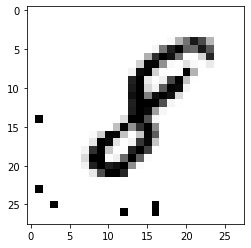

In [39]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  
  img = image.load_img(path,target_size=(28,28))
  plt.imshow(img,cmap='Greys')
  
  img = image.img_to_array(img) #converting to array
  print(img.shape)
  img = tf.image.rgb_to_grayscale(img,name=None) #converting channel 3 to 1, rgb to black
  print(img.shape)
  #sess = K.get_session() #starting a session
  array = image.img_to_array(img)
  img = np.expand_dims(array, axis = 0)
  print(img.shape)
  pred = model.predict(img)
  print(pred.argmax())